In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-dataset/data.csv


In [2]:
# Load the dataset
file_path = "/kaggle/input/real-estate-dataset/data.csv"
df = pd.read_csv(file_path)

# Display basic info to confirm successful loading
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


(None,
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
 0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
 1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
 2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
 3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
 4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
 
         B  LSTAT  MEDV  
 0  396.90   4.98  24.0  
 1  396.90   9.14  21.6  
 2  392.83   4.03  34.7  
 3  394.63   2.94  33.4  
 4  396.90   5.33  36.2  )

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Display basic info
df.info()

# Check for missing values
data = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [5]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (or use imputation if needed)
df = df.dropna()

# Encode categorical variables if any
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop(columns=["MEDV"])  # Replace with actual target column
y = df["MEDV"]

# Normalize features (optional, useful for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [6]:
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


In [7]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


In [8]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [9]:
def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 40)

evaluate(y_test, y_pred_svm, "Support Vector Machine")
evaluate(y_test, y_pred_dt, "Decision Tree")
evaluate(y_test, y_pred_rf, "Random Forest")


Support Vector Machine Performance:
Mean Squared Error (MSE): 23.7872
Mean Absolute Error (MAE): 2.9757
R² Score: 0.6436
----------------------------------------
Decision Tree Performance:
Mean Squared Error (MSE): 23.1710
Mean Absolute Error (MAE): 3.0471
R² Score: 0.6528
----------------------------------------
Random Forest Performance:
Mean Squared Error (MSE): 14.4365
Mean Absolute Error (MAE): 2.4832
R² Score: 0.7837
----------------------------------------


In [10]:
results = pd.DataFrame({
    "Model": ["SVM", "Decision Tree", "Random Forest"],
    "MSE": [
        mean_squared_error(y_test, y_pred_svm),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf),
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_svm),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf),
    ],
    "R² Score": [
        r2_score(y_test, y_pred_svm),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf),
    ]
})

results


,Model,MSE,MAE,R² Score
0,SVM,23.787200,2.975658,0.643593
1,Decision Tree,23.170980,3.047059,0.652826
2,Random Forest,14.436525,2.483235,0.783696


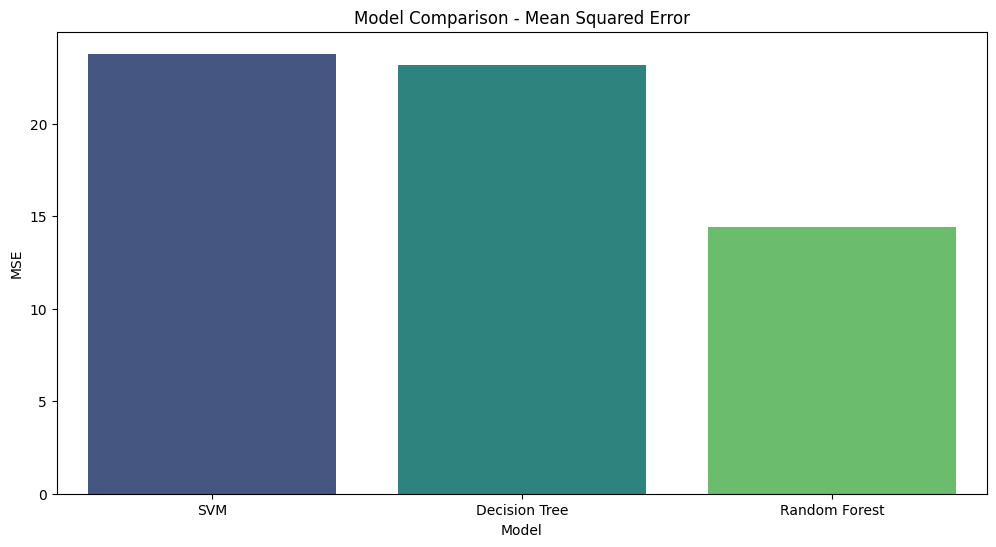

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results["Model"], y=results["MSE"], palette="viridis")
plt.title("Model Comparison - Mean Squared Error")
plt.show()
